In [1]:
# bank_interest_rate

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('loan_data_train.csv')
df.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


In [4]:
df.isna().sum()

ID                                 1
Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      0
Loan.Length                        1
Loan.Purpose                       1
Debt.To.Income.Ratio               1
State                              1
Home.Ownership                     1
Monthly.Income                     3
FICO.Range                         0
Open.CREDIT.Lines                  4
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 69
dtype: int64

In [5]:
df['ID'].nunique() # drop id colum as it have all unique values

2199

In [6]:
df.drop('ID',axis=1,inplace=True)

<AxesSubplot:>

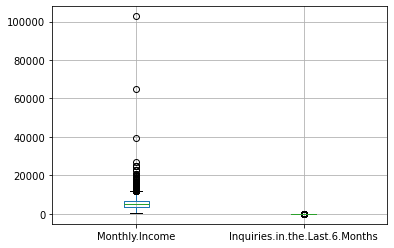

In [7]:
df.boxplot()

In [8]:
str(df.columns).replace(".",'_')

"Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',\n       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',\n       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',\n       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',\n       'Employment_Length'],\n      dtype='object')"

In [9]:
df.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

In [10]:
df.rename(columns={'Amount.Requested':'Amount_Requested', 
                   'Amount.Funded.By.Investors':'Amount_Funded_By_Investors', 
                   'Interest.Rate':'Interest_Rate',
       'Loan.Length':'Loan_Length', 'Loan.Purpose':'Loan_Purpose', 
                   'Debt.To.Income.Ratio':'Debt_To_Income_Ratio',
                   'State':'State','Home.Ownership':'Home_Ownership',
                   'Monthly.Income':'Monthly_Income',
                   'FICO.Range':'FICO_Range', 
                   'Open.CREDIT.Lines':'Open_CREDIT_Lines',
                   'Revolving.CREDIT.Balance':'Revolving_CREDIT_Balance',
                   'Inquiries.in.the.Last.6.Months':'Inquiries_in_the_Last_6_Months',
                   'Employment.Length':'Employment_Length'},inplace=True)

In [11]:
df.columns

Index(['Amount_Requested', 'Amount_Funded_By_Investors', 'Interest_Rate',
       'Loan_Length', 'Loan_Purpose', 'Debt_To_Income_Ratio', 'State',
       'Home_Ownership', 'Monthly_Income', 'FICO_Range', 'Open_CREDIT_Lines',
       'Revolving_CREDIT_Balance', 'Inquiries_in_the_Last_6_Months',
       'Employment_Length'],
      dtype='object')

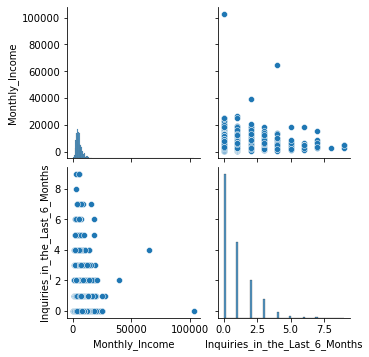

In [12]:
sns.pairplot(df)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2199 non-null   object 
 1   Amount_Funded_By_Investors      2199 non-null   object 
 2   Interest_Rate                   2200 non-null   object 
 3   Loan_Length                     2199 non-null   object 
 4   Loan_Purpose                    2199 non-null   object 
 5   Debt_To_Income_Ratio            2199 non-null   object 
 6   State                           2199 non-null   object 
 7   Home_Ownership                  2199 non-null   object 
 8   Monthly_Income                  2197 non-null   float64
 9   FICO_Range                      2200 non-null   object 
 10  Open_CREDIT_Lines               2196 non-null   object 
 11  Revolving_CREDIT_Balance        2197 non-null   object 
 12  Inquiries_in_the_Last_6_Months  21

In [14]:
df.describe()

,Monthly_Income,Inquiries_in_the_Last_6_Months
count,2197.000000,2197.000000
mean,5727.459290,0.898498
std,4073.529708,1.219223
min,588.500000,0.000000
25%,3458.000000,0.000000
50%,5000.000000,0.000000
75%,6883.330000,1.000000
max,102750.000000,9.000000


### Amount_Requested

In [15]:
df['Amount_Requested'].value_counts()

10000    178
12000    132
5000      96
20000     92
6000      89
        ... 
9525       1
1950       1
15300      1
11950      1
13225      1
Name: Amount_Requested, Length: 356, dtype: int64

In [16]:
df['Amount_Requested'].unique()

array(['25000', '19750', '2100', '28000', '24250', '5400', '16000',
       '6400', '24000', '8000', '9000', '13000', '10000', '3600', '7350',
       '17000', '18825', '4200', '5000', '3700', '6625', '15000', '29175',
       '6000', '22000', '18000', '12000', '6500', '4000', '7300', '19400',
       '11625', '3000', '19000', '2500', '17350', '21000', '20000',
       '1900', '23300', '8400', '1600', '7200', '15400', '7000', '20500',
       '24375', '5875', '14000', '5500', '4800', '34500', '20950', '7500',
       '14400', '14675', '24500', '35000', '11200', '30000', '3200',
       '11700', '11500', '8500', '16500', '16550', '13250', '5200',
       '2000', '4500', '20800', '8325', '6600', '7750', '19500', '27050',
       '8800', '11000', '3500', '21200', '2650', '8575', '13200', '10750',
       '5450', '2400', '15300', '17325', '19125', '19075', '5600',
       '10400', '16450', '11325', '10050', '14725', '16750', '4325',
       '10075', '10800', '23500', '6200', '2875', '27825', '12250',
 

In [17]:
df['Amount_Requested'].isna().sum()

1

In [18]:
df['Amount_Requested'].loc[df['Amount_Requested']=='.']

371     .
1357    .
1791    .
1991    .
Name: Amount_Requested, dtype: object

In [19]:
df.replace('.',np.nan,inplace=True)

In [20]:
df['Amount_Requested'].isna() .sum()

5

In [21]:
df['Amount_Requested']=df['Amount_Requested'].astype('float')

In [22]:
df['Amount_Requested'].dtype

dtype('float64')

In [23]:
df['Amount_Requested'].mean()

12496.469248291573

In [24]:
df['Amount_Requested'].mode()[0]

10000.0

In [25]:
df['Amount_Requested'].median()

10000.0

In [26]:
df['Amount_Requested'].fillna(df['Amount_Requested'].median(),inplace=True)

<AxesSubplot:xlabel='Amount_Requested'>

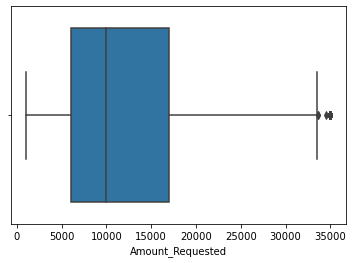

In [27]:
sns.boxplot(df['Amount_Requested'])

In [28]:
iqr=df['Amount_Requested'].quantile(0.75)-df['Amount_Requested'].quantile(0.25)
upper_limit=df['Amount_Requested'].quantile(0.75)+2*iqr
print("IQR",iqr)
print("upper limit",upper_limit)

IQR 11000.0
upper limit 39000.0


In [29]:
df['Amount_Requested'].loc[df['Amount_Requested']>upper_limit]

Series([], Name: Amount_Requested, dtype: float64)

In [30]:
# df.info()

### Amount_Funded_By_Investors

In [31]:
df['Amount_Funded_By_Investors'].dtype

dtype('O')

In [32]:
df['Amount_Funded_By_Investors'].isna().sum()

4

In [33]:
df['Amount_Funded_By_Investors']=df['Amount_Funded_By_Investors'].astype('float')

In [34]:
df['Amount_Funded_By_Investors'].mean()

12077.803406193085

In [35]:
df['Amount_Funded_By_Investors'].mode()

0    10000.0
Name: Amount_Funded_By_Investors, dtype: float64

In [36]:
df['Amount_Funded_By_Investors'].median()

10000.0

In [37]:
df['Amount_Funded_By_Investors'].fillna(df['Amount_Funded_By_Investors'].median(),inplace=True)

<AxesSubplot:xlabel='Amount_Funded_By_Investors'>

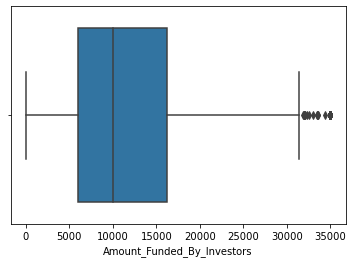

In [38]:
sns.boxplot(df['Amount_Funded_By_Investors'])

In [39]:
iqr=df['Amount_Funded_By_Investors'].quantile(0.75)-df['Amount_Funded_By_Investors'].quantile(0.25)
upper_limit=df['Amount_Funded_By_Investors'].quantile(0.75)+3*iqr
print("IQR",iqr)
print("upper limit",upper_limit)

IQR 10200.0
upper limit 46800.0


In [40]:
df['Amount_Funded_By_Investors'].loc[df['Amount_Funded_By_Investors']>upper_limit]

Series([], Name: Amount_Funded_By_Investors, dtype: float64)

In [41]:
# Interest_Rate >>>>>> target column

In [42]:
df['Interest_Rate'].dtype

dtype('O')

In [43]:
df['Interest_Rate']

0       18.49%
1       17.27%
2       14.33%
3       16.29%
4       12.23%
         ...  
2195    23.28%
2196    14.33%
2197    15.31%
2198    20.99%
2199    10.16%
Name: Interest_Rate, Length: 2200, dtype: object

In [44]:
df['Interest_Rate']=df["Interest_Rate"].str.replace("%","")

In [45]:
df['Interest_Rate']=df['Interest_Rate'].astype('float') 

In [46]:
df['Interest_Rate'].isna().sum()

0

In [47]:
df.isna().sum()

Amount_Requested                   0
Amount_Funded_By_Investors         0
Interest_Rate                      0
Loan_Length                        2
Loan_Purpose                       1
Debt_To_Income_Ratio               1
State                              2
Home_Ownership                     1
Monthly_Income                     3
FICO_Range                         0
Open_CREDIT_Lines                  7
Revolving_CREDIT_Balance           5
Inquiries_in_the_Last_6_Months     3
Employment_Length                 70
dtype: int64

### Loan_Length

In [48]:
df['Loan_Length'].value_counts().to_dict()

{'36 months': 1722, '60 months': 476}

In [49]:
df['Loan_Length'].replace({'36 months': 36, '60 months': 60},inplace=True)

<AxesSubplot:xlabel='Loan_Length', ylabel='count'>

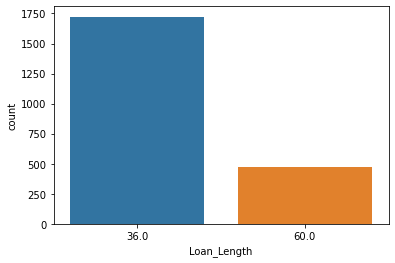

In [50]:
sns.countplot(df['Loan_Length'])

In [51]:
df['Loan_Length'].fillna((df['Loan_Length'].median()),inplace=True)

### Loan_Purpose

In [52]:
df['Loan_Purpose'].value_counts()

debt_consolidation    1147
credit_card            394
other                  174
home_improvement       135
major_purchase          84
small_business          80
car                     45
wedding                 35
medical                 26
moving                  25
house                   19
vacation                18
educational             14
renewable_energy         3
Name: Loan_Purpose, dtype: int64

In [53]:
df_Loan_Purpose=pd.get_dummies(df['Loan_Purpose'])
df.drop('Loan_Purpose',axis=1,inplace=True)
df_Loan_Purpose

,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2196,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2197,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2198,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
# df.info()

### Debt_To_Income_Ratio

In [55]:
df['Debt_To_Income_Ratio'].nunique()

1526

In [56]:
df['Debt_To_Income_Ratio'].dtype

dtype('O')

In [57]:
df['Debt_To_Income_Ratio']=df["Debt_To_Income_Ratio"].str.replace("%","")

In [58]:
df['Debt_To_Income_Ratio']=df['Debt_To_Income_Ratio'].astype('float')

In [59]:
df['Debt_To_Income_Ratio'].dtype

dtype('float64')

<AxesSubplot:xlabel='Debt_To_Income_Ratio'>

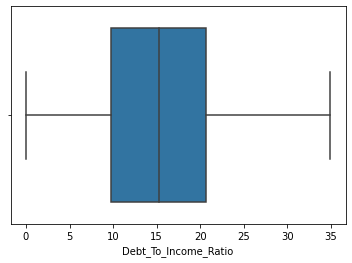

In [60]:
sns.boxplot(df['Debt_To_Income_Ratio'])

In [61]:
df['Debt_To_Income_Ratio'].fillna((df['Debt_To_Income_Ratio'].median()),inplace=True)

In [62]:
df=pd.concat([df,df_Loan_Purpose],axis=1)
df

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,25000.0,25000.00,18.49,60.0,27.56,VA,MORTGAGE,8606.56,720-724,11,...,0,0,0,0,0,0,0,0,0,0
1,19750.0,19750.00,17.27,60.0,13.39,NY,MORTGAGE,6737.50,710-714,14,...,0,0,0,0,0,0,0,0,0,0
2,2100.0,2100.00,14.33,36.0,3.50,LA,OWN,1000.00,690-694,13,...,0,0,1,0,0,0,0,0,0,0
3,28000.0,28000.00,16.29,36.0,19.62,NV,MORTGAGE,7083.33,710-714,12,...,0,0,0,0,0,0,0,0,0,0
4,24250.0,17431.82,12.23,60.0,23.79,OH,MORTGAGE,5833.33,730-734,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,30000.0,30000.00,23.28,60.0,12.10,IL,MORTGAGE,7083.33,675-679,16,...,0,0,0,0,0,1,0,0,0,0
2196,4200.0,4200.00,14.33,60.0,14.16,NJ,RENT,3850.00,700-704,4,...,0,0,0,0,0,0,0,0,0,0
2197,19800.0,19775.00,15.31,60.0,15.03,IL,MORTGAGE,6666.67,675-679,10,...,0,0,0,0,0,0,0,0,0,0
2198,18000.0,18000.00,20.99,60.0,11.63,CA,RENT,9051.83,670-674,5,...,0,0,0,0,0,0,0,0,0,0


# State

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2200 non-null   float64
 1   Amount_Funded_By_Investors      2200 non-null   float64
 2   Interest_Rate                   2200 non-null   float64
 3   Loan_Length                     2200 non-null   float64
 4   Debt_To_Income_Ratio            2200 non-null   float64
 5   State                           2198 non-null   object 
 6   Home_Ownership                  2199 non-null   object 
 7   Monthly_Income                  2197 non-null   float64
 8   FICO_Range                      2200 non-null   object 
 9   Open_CREDIT_Lines               2193 non-null   object 
 10  Revolving_CREDIT_Balance        2195 non-null   object 
 11  Inquiries_in_the_Last_6_Months  2197 non-null   float64
 12  Employment_Length               21

In [64]:
df['State'].value_counts()

CA    376
NY    231
FL    149
TX    146
PA     88
IL     87
GA     82
NJ     81
VA     70
MA     64
MD     59
NC     59
OH     59
CO     54
WA     52
CT     44
AZ     44
MI     38
AL     34
MN     30
NV     29
MO     29
SC     27
OR     25
WI     25
KS     21
OK     20
LA     20
KY     20
NH     14
UT     13
RI     13
HI     12
WV     12
NM     12
AR     11
DC      9
AK      8
DE      7
MT      7
VT      5
WY      4
SD      4
IN      3
MS      1
Name: State, dtype: int64

# Home_Ownership

In [65]:
df['Home_Ownership'].value_counts()

MORTGAGE    1018
RENT         999
OWN          177
OTHER          4
NONE           1
Name: Home_Ownership, dtype: int64

In [66]:
Home_Ownership_onehot = pd.get_dummies(df['Home_Ownership'],drop_first=True)

In [67]:
Home_Ownership_onehot.shape

(2200, 4)

# Monthly_Income

In [68]:
df['Monthly_Income']

0       8606.56
1       6737.50
2       1000.00
3       7083.33
4       5833.33
         ...   
2195    7083.33
2196    3850.00
2197    6666.67
2198    9051.83
2199    8333.33
Name: Monthly_Income, Length: 2200, dtype: float64

In [69]:
df['Monthly_Income'].describe()

count      2197.000000
mean       5727.459290
std        4073.529708
min         588.500000
25%        3458.000000
50%        5000.000000
75%        6883.330000
max      102750.000000
Name: Monthly_Income, dtype: float64

<AxesSubplot:xlabel='Monthly_Income'>

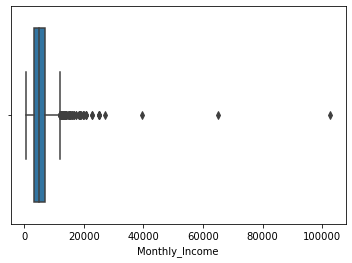

In [70]:
sns.boxplot(x=df['Monthly_Income'])

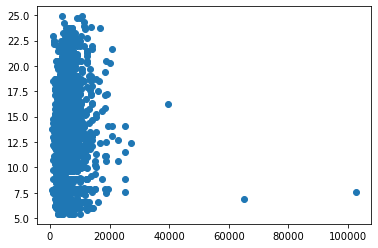

In [71]:
plt.scatter(df['Monthly_Income'],df['Interest_Rate'])

<AxesSubplot:xlabel='Monthly_Income', ylabel='Count'>

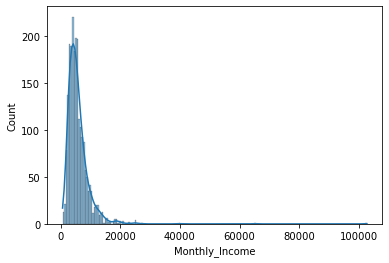

In [72]:
sns.histplot(df['Monthly_Income'],kde=True)

In [73]:
df['Monthly_Income'].fillna((df['Monthly_Income'].median()),inplace=True)

# FICO_Range

In [74]:
df['FICO_Range']

0       720-724
1       710-714
2       690-694
3       710-714
4       730-734
         ...   
2195    675-679
2196    700-704
2197    675-679
2198    670-674
2199    710-714
Name: FICO_Range, Length: 2200, dtype: object

In [75]:
def ranges(x):
    sp=x.split('-')
    return sp[1]

In [76]:
df['FICO_Range_from'] = df['FICO_Range'].apply(ranges)
df['FICO_Range_to'] = df['FICO_Range'].apply(ranges)

In [77]:
df['FICO_Range_from']=df['FICO_Range_from'].astype(int)

In [78]:
df['FICO_Range_to']=df['FICO_Range_to'].astype(int)

In [79]:
df['FICO_Range_from']

0       724
1       714
2       694
3       714
4       734
       ... 
2195    679
2196    704
2197    679
2198    674
2199    714
Name: FICO_Range_from, Length: 2200, dtype: int32

In [80]:
df['FICO_Range_to']

0       724
1       714
2       694
3       714
4       734
       ... 
2195    679
2196    704
2197    679
2198    674
2199    714
Name: FICO_Range_to, Length: 2200, dtype: int32

In [81]:
#df.info()

# Open_CREDIT_Lines

In [82]:
df['Open_CREDIT_Lines']

0       11
1       14
2       13
3       12
4        6
        ..
2195    16
2196     4
2197    10
2198     5
2199    10
Name: Open_CREDIT_Lines, Length: 2200, dtype: object

In [83]:
df['Open_CREDIT_Lines'].describe()

count     2193
unique      28
top          8
freq       226
Name: Open_CREDIT_Lines, dtype: object

In [84]:
df['Open_CREDIT_Lines'].isna().sum()

7

In [85]:
median = df['Open_CREDIT_Lines'].median()

In [86]:
df['Open_CREDIT_Lines'].fillna(median,axis=0,inplace=True)

In [87]:
df['Open_CREDIT_Lines'].isna().sum()

0

In [88]:
df['Open_CREDIT_Lines']=df['Open_CREDIT_Lines'].astype(int)

<AxesSubplot:xlabel='Open_CREDIT_Lines'>

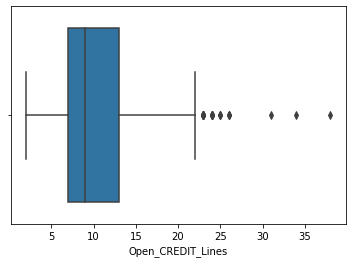

In [89]:
sns.boxplot(x=df['Open_CREDIT_Lines'])

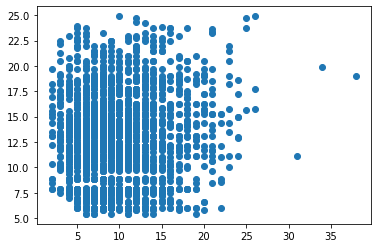

In [90]:
plt.scatter(df['Open_CREDIT_Lines'],df['Interest_Rate'])

<AxesSubplot:xlabel='Monthly_Income', ylabel='Count'>

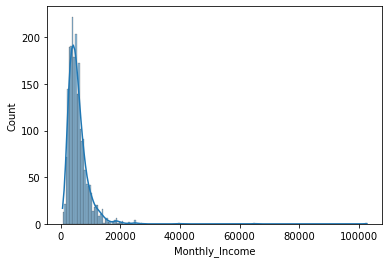

In [91]:
sns.histplot(df['Monthly_Income'],kde=True)

In [92]:
df[df['Open_CREDIT_Lines']>35]

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,...,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,FICO_Range_from,FICO_Range_to
2117,35000.0,35000.0,19.05,36.0,21.12,CT,MORTGAGE,13750.0,735-739,38,...,0,0,0,0,0,0,0,0,739,739


In [93]:
df[df['Open_CREDIT_Lines']>30]

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,FICO_Range,Open_CREDIT_Lines,...,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,FICO_Range_from,FICO_Range_to
1244,21000.0,6165.31,11.09,36.0,21.28,CA,OWN,18333.33,745-749,31,...,0,0,0,0,0,0,0,0,749,749
1660,10000.0,10000.00,19.91,36.0,23.35,CO,MORTGAGE,6000.00,680-684,34,...,0,0,0,0,0,0,0,0,684,684
2117,35000.0,35000.00,19.05,36.0,21.12,CT,MORTGAGE,13750.00,735-739,38,...,0,0,0,0,0,0,0,0,739,739


In [94]:
df.drop('FICO_Range',axis=1,inplace=True)

In [95]:
df=pd.concat([df,Home_Ownership_onehot],axis=1)
df

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,State,Home_Ownership,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,...,renewable_energy,small_business,vacation,wedding,FICO_Range_from,FICO_Range_to,NONE,OTHER,OWN,RENT
0,25000.0,25000.00,18.49,60.0,27.56,VA,MORTGAGE,8606.56,11,15210,...,0,0,0,0,724,724,0,0,0,0
1,19750.0,19750.00,17.27,60.0,13.39,NY,MORTGAGE,6737.50,14,19070,...,0,0,0,0,714,714,0,0,0,0
2,2100.0,2100.00,14.33,36.0,3.50,LA,OWN,1000.00,13,893,...,0,0,0,0,694,694,0,0,1,0
3,28000.0,28000.00,16.29,36.0,19.62,NV,MORTGAGE,7083.33,12,38194,...,0,0,0,0,714,714,0,0,0,0
4,24250.0,17431.82,12.23,60.0,23.79,OH,MORTGAGE,5833.33,6,31061,...,0,0,0,0,734,734,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,30000.0,30000.00,23.28,60.0,12.10,IL,MORTGAGE,7083.33,16,17969,...,0,0,0,0,679,679,0,0,0,0
2196,4200.0,4200.00,14.33,60.0,14.16,NJ,RENT,3850.00,4,5718,...,0,0,0,0,704,704,0,0,0,1
2197,19800.0,19775.00,15.31,60.0,15.03,IL,MORTGAGE,6666.67,10,46879,...,0,0,0,0,679,679,0,0,0,0
2198,18000.0,18000.00,20.99,60.0,11.63,CA,RENT,9051.83,5,32394,...,0,0,0,0,674,674,0,0,0,1


# Revolving.CREDIT.Balance

In [96]:
#column_name
df.rename({'Revolving.CREDIT.Balance':'Revolving_CREDIT_Balance'},axis=1,inplace=True)
df['Revolving_CREDIT_Balance']

0       15210
1       19070
2         893
3       38194
4       31061
        ...  
2195    17969
2196     5718
2197    46879
2198    32394
2199    10204
Name: Revolving_CREDIT_Balance, Length: 2200, dtype: object

In [97]:
df['Revolving_CREDIT_Balance'].isna().sum()

5

In [98]:
df['Revolving_CREDIT_Balance'].nunique()

2079

In [99]:
df['Revolving_CREDIT_Balance'].unique()

array(['15210', '19070', '893', ..., '46879', '32394', '10204'],
      dtype=object)

In [100]:
df['Revolving_CREDIT_Balance']=df['Revolving_CREDIT_Balance'].astype('float')

<AxesSubplot:xlabel='Revolving_CREDIT_Balance'>

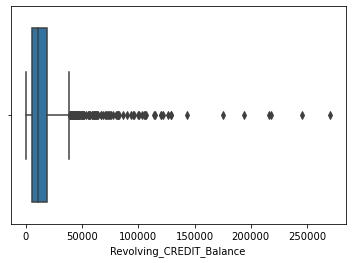

In [101]:
# outliers
sns.boxplot(df['Revolving_CREDIT_Balance'])

In [102]:
df['Revolving_CREDIT_Balance'].fillna(df['Revolving_CREDIT_Balance'].median(),inplace=True)

In [103]:
df['Revolving_CREDIT_Balance'].isna().sum()

0

In [104]:
# iqr
q3=df['Revolving_CREDIT_Balance'].quantile(0.75)
q1=df['Revolving_CREDIT_Balance'].quantile(0.25)

iqr=q3-q1
upper_tail=q3+(3*iqr)
lower_tail=q1-(3*iqr)
upper_tail

58465.25

In [105]:
df['Revolving_CREDIT_Balance']=np.log(df['Revolving_CREDIT_Balance'])
df['Revolving_CREDIT_Balance'].head()

0     9.629708
1     9.855872
2     6.794587
3    10.550434
4    10.343708
Name: Revolving_CREDIT_Balance, dtype: float64

<AxesSubplot:xlabel='Revolving_CREDIT_Balance'>

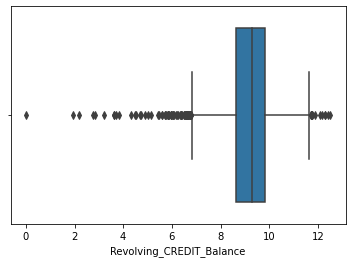

In [106]:
sns.boxplot(df['Revolving_CREDIT_Balance'])

In [107]:
# iqr
q3=df['Revolving_CREDIT_Balance'].quantile(0.75)
q1=df['Revolving_CREDIT_Balance'].quantile(0.25)

iqr=q3-q1
upper_tail=q3+(1.5*iqr)
lower_tail=q1-(1.5*iqr)
lower_tail

6.817316022651861

In [108]:
df.loc[(df['Revolving_CREDIT_Balance']>upper_tail)|(df['Revolving_CREDIT_Balance']<lower_tail)].shape

(116, 32)

In [109]:
df.loc[(df['Revolving_CREDIT_Balance']>upper_tail),'Revolving_CREDIT_Balance']=upper_tail
df.loc[(df['Revolving_CREDIT_Balance']<lower_tail),'Revolving_CREDIT_Balance']=lower_tail

<AxesSubplot:xlabel='Revolving_CREDIT_Balance'>

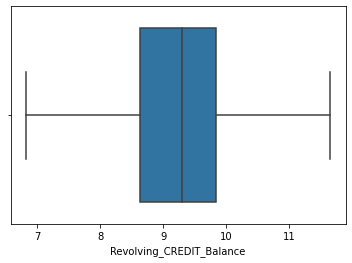

In [110]:
# after removing outliers
sns.boxplot(df['Revolving_CREDIT_Balance'])

# Inquiries.in.the.Last.6.Months

In [111]:
#column_name
df.rename({'Inquiries.in.the.Last.6.Months':'Inquiries_in_the_Last_6_Months'},axis=1,inplace=True)
df['Inquiries_in_the_Last_6_Months']

0       3.0
1       3.0
2       1.0
3       1.0
4       2.0
       ... 
2195    1.0
2196    0.0
2197    3.0
2198    2.0
2199    0.0
Name: Inquiries_in_the_Last_6_Months, Length: 2200, dtype: float64

In [112]:
df['Inquiries_in_the_Last_6_Months'].isna().sum()

3

In [113]:
df['Inquiries_in_the_Last_6_Months'].nunique()

10

In [114]:
df['Inquiries_in_the_Last_6_Months']=df['Inquiries_in_the_Last_6_Months'].astype('float')

<AxesSubplot:xlabel='Inquiries_in_the_Last_6_Months'>

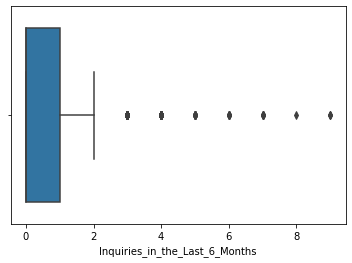

In [115]:
# outliers
sns.boxplot(df['Inquiries_in_the_Last_6_Months'])

In [116]:
df['Inquiries_in_the_Last_6_Months'].fillna(df['Inquiries_in_the_Last_6_Months'].median(),inplace=True)

In [117]:
# iqr
q3=df['Inquiries_in_the_Last_6_Months'].quantile(0.75)
q1=df['Inquiries_in_the_Last_6_Months'].quantile(0.25)

iqr=q3-q1
upper_tail=q3+(1.5*iqr)
lower_tail=q1-(1.5*iqr)
upper_tail

2.5

In [118]:
df.loc[df['Inquiries_in_the_Last_6_Months']>upper_tail].shape

(222, 32)

In [119]:
df.loc[(df['Inquiries_in_the_Last_6_Months']>upper_tail),'Inquiries_in_the_Last_6_Months']=upper_tail

<AxesSubplot:xlabel='Inquiries_in_the_Last_6_Months'>

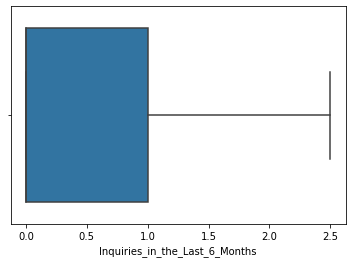

In [120]:
sns.boxplot(df['Inquiries_in_the_Last_6_Months'])

# Employment.Length

In [121]:
#column_name
df.rename({'Employment.Length':'Employment_Length'},axis=1,inplace=True)
df['Employment_Length']

0         5 years
1         4 years
2        < 1 year
3       10+ years
4       10+ years
          ...    
2195    10+ years
2196      2 years
2197      6 years
2198      4 years
2199      2 years
Name: Employment_Length, Length: 2200, dtype: object

In [122]:
df['Employment_Length'].isna().sum()

70

In [123]:
df['Employment_Length'].isna().mean()*100

3.1818181818181817

In [124]:
df['Employment_Length'].nunique()

11

In [125]:
df['Employment_Length'].unique()

array(['5 years', '4 years', '< 1 year', '10+ years', nan, '2 years',
       '8 years', '1 year', '6 years', '7 years', '3 years', '9 years'],
      dtype=object)

In [126]:
df['Employment_Length'].value_counts()

10+ years    575
< 1 year     229
2 years      217
3 years      203
5 years      181
4 years      162
1 year       159
6 years      134
7 years      109
8 years       95
9 years       66
Name: Employment_Length, dtype: int64

In [127]:
df['Employment_Length'].fillna('10+ years',inplace=True)

In [128]:
df['Employment_Length'].unique()

array(['5 years', '4 years', '< 1 year', '10+ years', '2 years',
       '8 years', '1 year', '6 years', '7 years', '3 years', '9 years'],
      dtype=object)

In [129]:
df['Employment_Length'].replace({'5 years':5, '4 years':4, '< 1 year':0.5, '10+ years':10, '2 years':2,
       '8 years':8, '1 year':1, '6 years':6, '7 years':7, '3 years':3, '9 years':9},inplace=True)

In [130]:
df['Employment_Length'].unique()

array([ 5. ,  4. ,  0.5, 10. ,  2. ,  8. ,  1. ,  6. ,  7. ,  3. ,  9. ])

In [131]:
df['Employment_Length'].dtype

dtype('float64')

<AxesSubplot:xlabel='Employment_Length'>

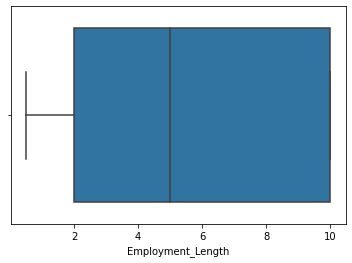

In [132]:
sns.boxplot(df['Employment_Length'])

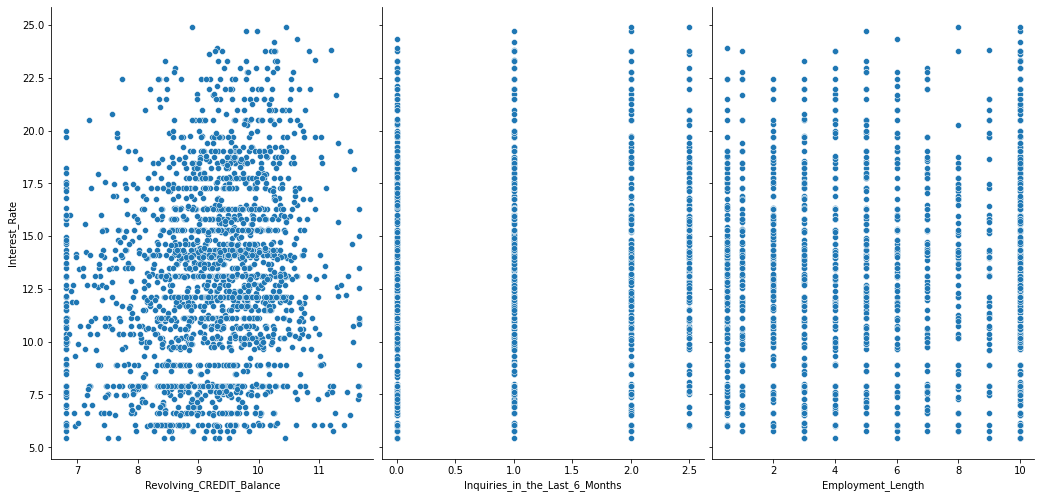

In [133]:
# pairplot 
sns.pairplot(df,x_vars=['Revolving_CREDIT_Balance','Inquiries_in_the_Last_6_Months','Employment_Length'],y_vars='Interest_Rate',size=7,aspect=0.7)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount_Requested                2200 non-null   float64
 1   Amount_Funded_By_Investors      2200 non-null   float64
 2   Interest_Rate                   2200 non-null   float64
 3   Loan_Length                     2200 non-null   float64
 4   Debt_To_Income_Ratio            2200 non-null   float64
 5   State                           2198 non-null   object 
 6   Home_Ownership                  2199 non-null   object 
 7   Monthly_Income                  2200 non-null   float64
 8   Open_CREDIT_Lines               2200 non-null   int32  
 9   Revolving_CREDIT_Balance        2200 non-null   float64
 10  Inquiries_in_the_Last_6_Months  2200 non-null   float64
 11  Employment_Length               2200 non-null   float64
 12  car                             22

In [135]:
df.isna().sum()

Amount_Requested                  0
Amount_Funded_By_Investors        0
Interest_Rate                     0
Loan_Length                       0
Debt_To_Income_Ratio              0
State                             2
Home_Ownership                    1
Monthly_Income                    0
Open_CREDIT_Lines                 0
Revolving_CREDIT_Balance          0
Inquiries_in_the_Last_6_Months    0
Employment_Length                 0
car                               0
credit_card                       0
debt_consolidation                0
educational                       0
home_improvement                  0
house                             0
major_purchase                    0
medical                           0
moving                            0
other                             0
renewable_energy                  0
small_business                    0
vacation                          0
wedding                           0
FICO_Range_from                   0
FICO_Range_to               

In [136]:
df.drop(['State','Home_Ownership'],axis=1,inplace=True)

# Without Feature Selection 

## Linear Regression

In [137]:
df1 = df.copy()

In [315]:
df1.shape

(2200, 30)

In [138]:
x = df1.drop(['Interest_Rate'],axis=1)
y = df1['Interest_Rate']

In [139]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [140]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=5)

In [141]:
linear = LinearRegression()
linear.fit(x_train,y_train)

LinearRegression()

In [142]:
# Testing data

y_pred_test_linear = linear.predict(x_test)

mae = mean_absolute_error(y_test,y_pred_test_linear)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_test,y_pred_test_linear)
print('mean_squared_error >>  ', mse)

rmae = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmae)

r2_scores = r2_score(y_test,y_pred_test_linear)
print('r2_scores >>  ', r2_scores)

mean_absolute_error >>   1.586980087354076
mean_squared_error >>   4.172525198697675
root_mean_squared_error >>   2.0426759896512405
r2_scores >>   0.7475769386405677


In [143]:
# Training data

y_pred_train_linear = linear.predict(x_train)

mae = mean_absolute_error(y_train,y_pred_train_linear)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_train,y_pred_train_linear)
print('mean_squared_error >>  ', mse)

rmae = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmae)

r2_scores = r2_score(y_train,y_pred_train_linear)
print('r2_scores >>  ', r2_scores)


mean_absolute_error >>   1.5469290211294566
mean_squared_error >>   3.9428868347951855
root_mean_squared_error >>   1.985670374154579
r2_scores >>   0.7781639586340078


# Ridge 

In [144]:
ridge = Ridge()

hyp={'alpha':np.arange(0.1,1.1,0.1)}

ridge_rscv = RandomizedSearchCV(ridge,hyp,cv=10)
ridge_rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=Ridge(),
                   param_distributions={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [145]:
ridge_rscv.best_params_

{'alpha': 1.0}

In [146]:
# Testing data

y_pred_test = ridge_rscv.predict(x_test)

mae = mean_absolute_error(y_test,y_pred_test)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_test,y_pred_test)
print('mean_squared_error >>  ', mse)

rmae = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmae)

r2_scores = r2_score(y_test,y_pred_test)
print('r2_scores >>  ', r2_scores)


mean_absolute_error >>   1.5866775271193712
mean_squared_error >>   4.17172276168855
root_mean_squared_error >>   2.0424795621226055
r2_scores >>   0.7476254832500657


In [147]:
# Training data

y_pred_train = ridge_rscv.predict(x_train)

mae = mean_absolute_error(y_train,y_pred_train)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_train,y_pred_train)
print('mean_squared_error >>  ', mse)

rmae = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmae)

r2_scores = r2_score(y_train,y_pred_train)
print('r2_scores >>  ', r2_scores)


mean_absolute_error >>   1.546795536108257
mean_squared_error >>   3.943415677244345
root_mean_squared_error >>   1.985803534402219
r2_scores >>   0.7781342047201006


# Lasso

In [148]:
lasso = Lasso()

hyp={'alpha':np.arange(0.1,1.1,0.1)}

lasso_rscv = RandomizedSearchCV(ridge,hyp,cv=10)
lasso_rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=10, estimator=Ridge(),
                   param_distributions={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [149]:
lasso_rscv.best_params_

{'alpha': 1.0}

In [150]:
# Testing data

y_pred_test = lasso_rscv.predict(x_test)

mae = mean_absolute_error(y_test,y_pred_test)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_test,y_pred_test)
print('mean_squared_error >>  ', mse)

rmae = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmae)

r2_scores = r2_score(y_test,y_pred_test)
print('r2_scores >>  ', r2_scores)


mean_absolute_error >>   1.5866775271193712
mean_squared_error >>   4.17172276168855
root_mean_squared_error >>   2.0424795621226055
r2_scores >>   0.7476254832500657


In [151]:
# Training data

y_pred_train = lasso_rscv.predict(x_train)

mae = mean_absolute_error(y_train,y_pred_train)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_train,y_pred_train)
print('mean_squared_error >>  ', mse)

rmae = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmae)

r2_scores = r2_score(y_train,y_pred_train)
print('r2_scores >>  ', r2_scores)


mean_absolute_error >>   1.546795536108257
mean_squared_error >>   3.943415677244345
root_mean_squared_error >>   1.985803534402219
r2_scores >>   0.7781342047201006


# Feature Selection

## Fisher Score

In [152]:
from skfeature.function.similarity_based import fisher_score

<AxesSubplot:>

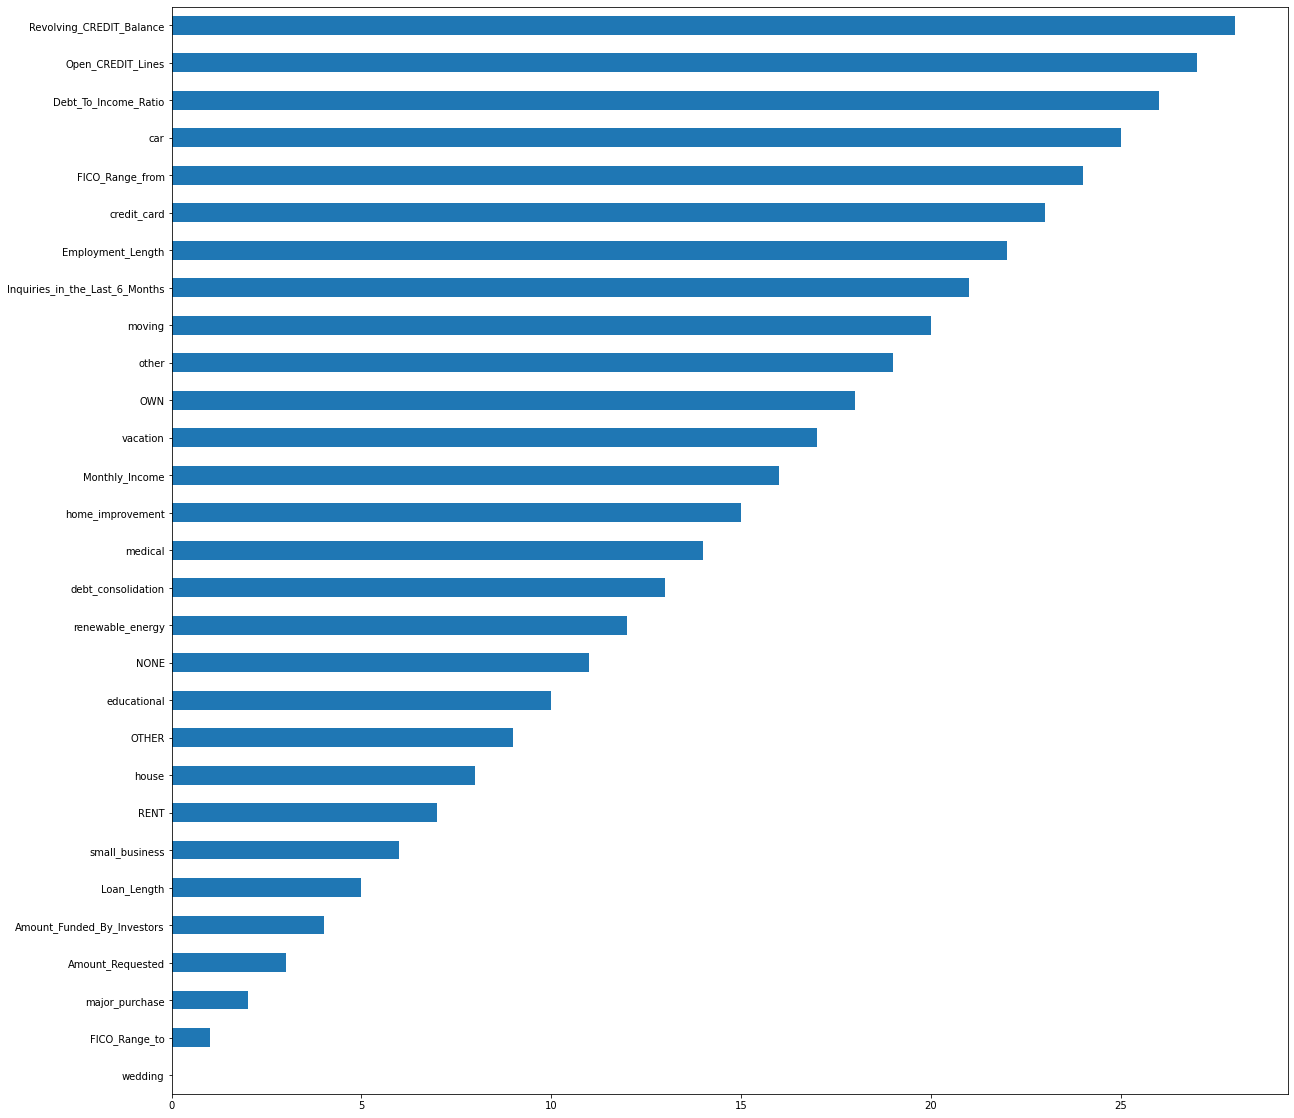

In [153]:
array = fisher_score.fisher_score(x.values,y)
plt.figure(figsize=(20,20))
s1 = pd.Series(array, index = x.columns)
s1.sort_values().plot(kind = 'barh')

In [154]:
array<=10

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False,  True, False,  True,  True, False, False,
       False, False,  True, False,  True, False,  True, False,  True,
       False,  True])

In [155]:
X = x.drop(x.columns[np.where(array < 4)[0]],axis = 1)

In [156]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

In [157]:
X_train

,Amount_Funded_By_Investors,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Revolving_CREDIT_Balance,Inquiries_in_the_Last_6_Months,Employment_Length,car,credit_card,...,moving,other,renewable_energy,small_business,vacation,FICO_Range_from,NONE,OTHER,OWN,RENT
807,10000.0,36.0,21.89,3417.00,13,9.801953,0.0,4.0,0,0,...,0,1,0,0,0,684,0,0,0,0
2120,20000.0,36.0,11.01,7083.33,13,10.251465,2.0,10.0,0,0,...,0,0,0,0,0,734,0,0,0,0
812,10000.0,36.0,13.57,4583.33,16,10.126191,1.0,10.0,0,0,...,0,0,0,0,0,679,0,0,0,0
1442,7200.0,36.0,21.74,4300.00,7,10.409974,0.0,10.0,0,0,...,0,0,0,0,0,714,0,0,0,1
1051,17000.0,60.0,11.12,4166.67,10,9.853246,0.0,10.0,0,0,...,0,0,0,0,0,764,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,15000.0,36.0,22.45,5078.75,19,9.488351,0.0,10.0,0,0,...,0,0,0,0,0,669,0,0,0,0
1032,10000.0,36.0,10.93,7083.00,13,9.383453,0.0,3.0,0,0,...,0,0,0,0,0,674,0,0,0,1
2121,21825.0,60.0,20.32,4400.00,7,9.123802,0.0,4.0,0,1,...,0,0,0,0,0,684,0,0,0,1
1424,1625.0,36.0,4.32,1666.67,3,7.472501,2.5,3.0,0,0,...,0,0,0,0,0,749,0,0,1,0


In [158]:
linear_fisher_score = LinearRegression()
linear_fisher_score.fit(X_train,y_train)

LinearRegression()

In [159]:
# Testing data

y_pred_test = linear_fisher_score.predict(X_test)

mae = mean_absolute_error(y_test,y_pred_test)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_test,y_pred_test)
print('mean_squared_error >>  ', mse)

rmae = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmae)

r2_scores = r2_score(y_test,y_pred_test)
print('r2_scores >>  ', r2_scores)


mean_absolute_error >>   1.5930438895825882
mean_squared_error >>   4.204711701721854
root_mean_squared_error >>   2.0505393684886553
r2_scores >>   0.7456297687036784


In [160]:
# Training data

y_pred_train = linear_fisher_score.predict(X_train)

mae = mean_absolute_error(y_train,y_pred_train)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(y_train,y_pred_train)
print('mean_squared_error >>  ', mse)

rmae = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmae)

r2_scores = r2_score(y_train,y_pred_train)
print('r2_scores >>  ', r2_scores)


mean_absolute_error >>   1.5525677736562549
mean_squared_error >>   3.959532000927866
root_mean_squared_error >>   1.9898572815475652
r2_scores >>   0.7772274626305802


## Variance Threshold

In [316]:
from sklearn.feature_selection import VarianceThreshold
var_thresh = VarianceThreshold(threshold=1.5)
var_thresh.fit(df1)
array_1 = var_thresh.get_support()
array_1

array([ True,  True,  True,  True,  True,  True,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True, False,
       False, False, False])

In [317]:
np.where(array_1 == False)

(array([ 7,  8, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 26,
        27, 28, 29], dtype=int64),)

In [318]:
var_data = df1.drop(df1.columns[np.where(array_1 == False)[0]],axis = 1)
var_data

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Employment_Length,FICO_Range_from,FICO_Range_to
0,25000.0,25000.00,18.49,60.0,27.56,8606.56,11,5.0,724,724
1,19750.0,19750.00,17.27,60.0,13.39,6737.50,14,4.0,714,714
2,2100.0,2100.00,14.33,36.0,3.50,1000.00,13,0.5,694,694
3,28000.0,28000.00,16.29,36.0,19.62,7083.33,12,10.0,714,714
4,24250.0,17431.82,12.23,60.0,23.79,5833.33,6,10.0,734,734
...,...,...,...,...,...,...,...,...,...,...
2195,30000.0,30000.00,23.28,60.0,12.10,7083.33,16,10.0,679,679
2196,4200.0,4200.00,14.33,60.0,14.16,3850.00,4,2.0,704,704
2197,19800.0,19775.00,15.31,60.0,15.03,6666.67,10,6.0,679,679
2198,18000.0,18000.00,20.99,60.0,11.63,9051.83,5,4.0,674,674


In [319]:
var_data.describe()

,Amount_Requested,Amount_Funded_By_Investors,Interest_Rate,Loan_Length,Debt_To_Income_Ratio,Monthly_Income,Open_CREDIT_Lines,Employment_Length,FICO_Range_from,FICO_Range_to
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,12490.795455,12074.025582,13.051218,41.192727,15.371036,5726.467300,10.078182,5.563864,710.084091,710.084091
std,7848.946790,7768.761561,4.173349,9.884607,7.518771,4070.838644,4.491240,3.569283,35.263185,35.263185
min,1000.000000,-0.010000,5.420000,36.000000,0.000000,588.500000,2.000000,0.500000,644.000000,644.000000
25%,6000.000000,6000.000000,10.160000,36.000000,9.737500,3458.000000,7.000000,2.000000,684.000000,684.000000
50%,10000.000000,10000.000000,13.110000,36.000000,15.220000,5000.000000,9.000000,5.000000,704.000000,704.000000
75%,17000.000000,16200.000000,15.800000,36.000000,20.672500,6877.082500,13.000000,10.000000,729.000000,729.000000
max,35000.000000,35000.000000,24.890000,60.000000,34.910000,102750.000000,38.000000,10.000000,834.000000,834.000000


In [320]:
var_x = var_data.drop('Interest_Rate',axis=1)
var_y = var_data['Interest_Rate']

In [321]:
var_x_train,var_x_test,var_y_train,var_y_test = train_test_split(var_x,var_y,test_size=0.3,random_state=5)

In [322]:
linear_Variance_Threshold = LinearRegression()
linear_Variance_Threshold.fit(var_x_train,var_y_train)

LinearRegression()

In [323]:
# Testing data

y_pred_test = linear_Variance_Threshold.predict(var_x_test)

mae = mean_absolute_error(var_y_test,y_pred_test)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(var_y_test,y_pred_test)
print('mean_squared_error >>  ', mse)

rmae = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmae)

r2_scores = r2_score(var_y_test,y_pred_test)
print('r2_scores >>  ', r2_scores)


mean_absolute_error >>   1.6664336140379625
mean_squared_error >>   4.549777936477145
root_mean_squared_error >>   2.13302084764241
r2_scores >>   0.7247544782738231


In [324]:
# Training data

y_pred_train = linear_Variance_Threshold.predict(var_x_train)

mae = mean_absolute_error(var_y_train,y_pred_train)
print('mean_absolute_error >>  ', mae)

mse = mean_squared_error(var_y_train,y_pred_train)
print('mean_squared_error >>  ', mse)

rmae = np.sqrt(mse)
print('root_mean_squared_error >>  ', rmae)

r2_scores = r2_score(var_y_train,y_pred_train)
print('r2_scores >>  ', r2_scores)


mean_absolute_error >>   1.6273955391994097
mean_squared_error >>   4.344705383757326
root_mean_squared_error >>   2.0843956879050882
r2_scores >>   0.7555567066422527


# Result

In [ ]:
Total column = 30

Simple Linear Regression:
    Testing Data:
        
    1) MSE = 4.17
    2) r2  = 0.74
    
    Training Data:
        
    1) MSE = 3.94
    2) r2  = 0.77
    
############################################################################

Ridge and Lasso showing same score like Simple Linear Regression

############################################################################

False column = 3
Linear Regression (Fisher Score < 4 columns): 
    Testing Data:
        
    1) MSE = 4.20
    2) r2  = 0.74
    
    Training Data:
        
    1) MSE = 3.95
    2) r2  = 0.77
    
###########################################################################

False column = 4
Linear Regression (Fisher Score < 5 columns): 
    Testing Data:
        
    1) MSE = 5.25
    2) r2  = 0.68
    
    Training Data:
        
    1) MSE = 5.00
    2) r2  = 0.71
    
##########################################################################

False column = 12
Linear Regression (Variance Threshold = 0.8): 
    Testing Data:
        
    1) MSE = 4.22
    2) r2  = 0.74
    
    Training Data:
        
    1) MSE = 4.04
    2) r2  = 0.77
    
##########################################################################
    
False column = 11
Linear Regression (Variance Threshold = 0.9): 
    Testing Data:
        
    1) MSE = 4.51
    2) r2  = 0.72
    
    Training Data:
        
    1) MSE = 4.23
    2) r2  = 0.76

##########################################################################

False column = 10
Linear Regression (Variance Threshold = 1.5): 
    Testing Data:
        
    1) MSE = 4.51
    2) r2  = 0.72
    
    Training Data:
        
    1) MSE = 4.23
    2) r2  = 0.75